# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import stats as st

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv') 
data_1 = pd.read_csv('/datasets/geo_data_1.csv') 
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
print(data_0.head(2))
print(data_0.describe())

      id        f0        f1       f2     product
0  txEyH  0.705745 -0.497823  1.22117  105.280062
1  2acmU  1.334711 -0.340164  4.36508   73.037750
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347


In [4]:
print(data_1.head(2))
print(data_1.describe())

      id         f0        f1        f2    product
0  kBEdx -15.001348 -8.276000 -0.005876   3.179103
1  62mP7  14.272088 -3.475083  0.999183  26.953261
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408


In [5]:
print(data_2.head(2))
print(data_2.describe())

      id        f0        f1        f2    product
0  fwXo0 -1.146987  0.963328 -0.828965  27.758673
1  WJtFt  0.262778  0.269839 -2.530187  56.069697
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838


In [6]:
print('Количество дубликатов в data_0', data_0.duplicated().sum())
print('Количество дубликатов в data_1',data_1.duplicated().sum())
print('Количество дубликатов в data_2',data_2.duplicated().sum())

Количество дубликатов в data_0 0
Количество дубликатов в data_1 0
Количество дубликатов в data_2 0


In [7]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Посмотрели беглым взглядом на данные. Похоже, что есть выбросы, наверное с ними надо что-то делать, но пока решил не трогать. В целом вроде все нормально. Явных дубликатов нет. Нам нужно что-то сделать с айди, потому что по условию задачи, нужно будет обучить три модели линейной регрессии, а судя по характеристике данных id у нас object и судя по содержанию столбцов  представляют собой буквы и цифры. И, по идее нужно удалить строки с повторяющимися айдишками. 

In [10]:
for data in [data_0, data_1, data_2]:
    print('Дубликаты по id =', data.id.duplicated().sum())
    display(data[data.id.duplicated(keep=False)].sort_values(by='id'))
    print()
    data.drop_duplicates(subset='id', keep='first', inplace=True)

Дубликаты по id = 10


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502



Дубликаты по id = 4


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305



Дубликаты по id = 4


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [11]:
for data in [data_0, data_1, data_2]:
    print('Дубликаты по id =', data.id.duplicated().sum())
    display(data[data.id.duplicated(keep=False)].sort_values(by='id'))
    print()

Дубликаты по id = 0


,id,f0,f1,f2,product



Дубликаты по id = 0


,id,f0,f1,f2,product



Дубликаты по id = 0


,id,f0,f1,f2,product


Нашли 10 дубликатов, удалили их, проверили. Честно говоря, мне кажется, что на результаты это не сильно повлияет, ведь у нас 100000 строк в каждом дата-фрейме. Но надо так надо.

In [12]:
data_0.drop('id', axis=1, inplace=True)
data_1.drop('id', axis=1, inplace=True)
data_2.drop('id', axis=1, inplace=True)

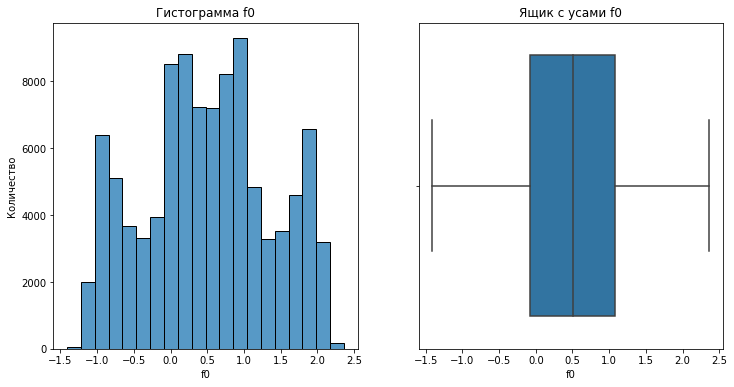

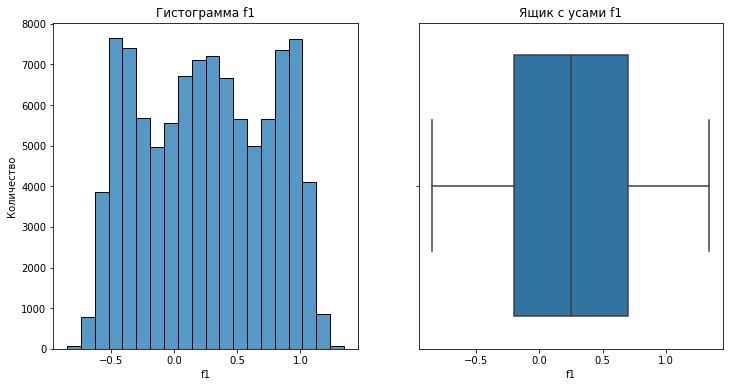

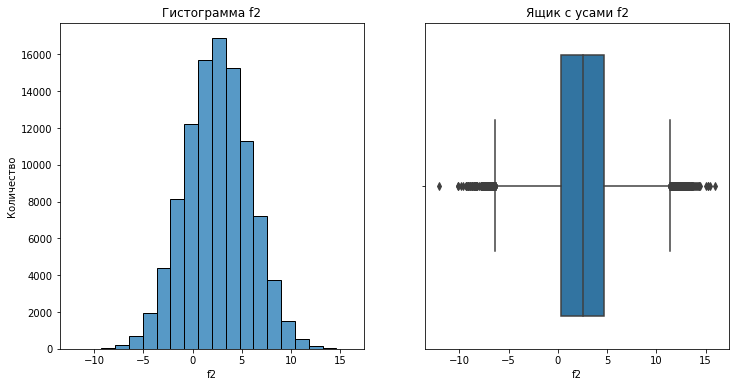

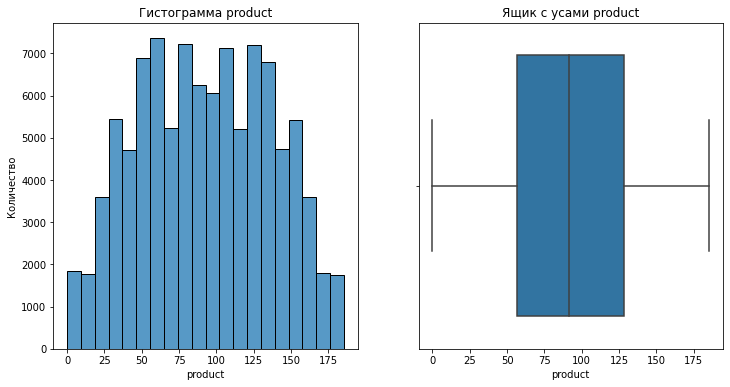

In [13]:
def plot_features(data_0):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for column in data_0.columns:
        if column != 'id':
            if data_0[column].dtype in ['int64', 'float64']:
                fig, axes = plt.subplots(1, 2, figsize=(12, 6))
                sns.histplot(data_0[column], kde=False, bins=20, ax=axes[0])
                axes[0].set_title(f'Гистограмма {column}')
                axes[0].set_xlabel(column)
                axes[0].set_ylabel('Количество')

                sns.boxplot(x=data_0[column], ax=axes[1])
                axes[1].set_title(f'Ящик с усами {column}')
                axes[1].set_xlabel(column)
                plt.show()
            else:
                plt.figure(figsize=(8, 6))
                counts = data_0[column].value_counts()
                plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
                plt.title(f'Диаграма {column}')
                plt.show()

plot_features(data_0)

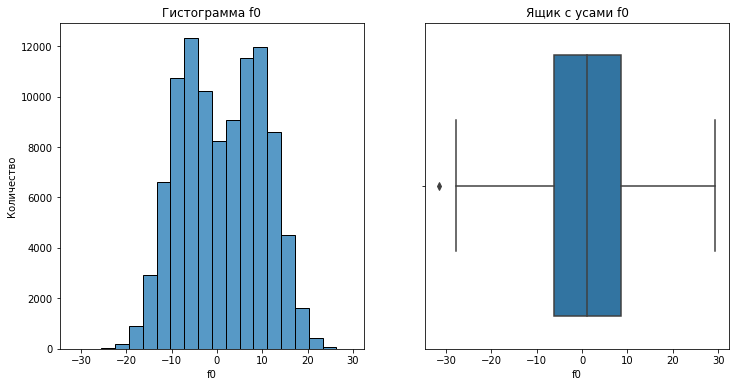

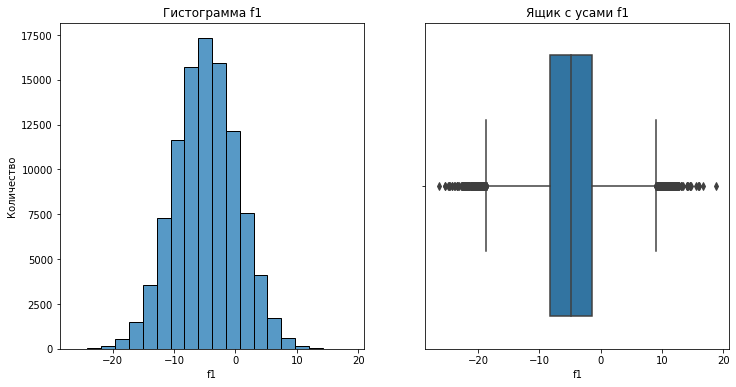

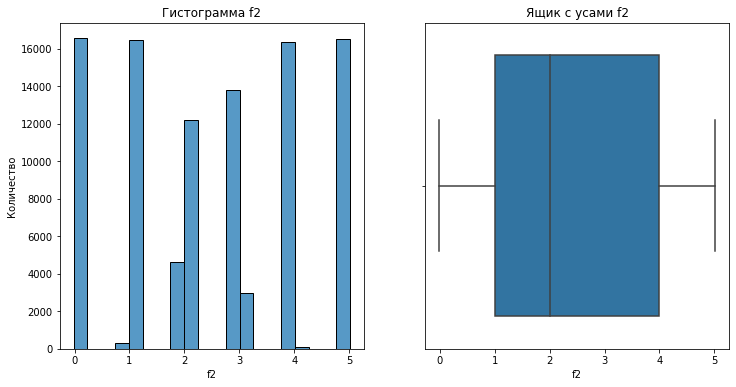

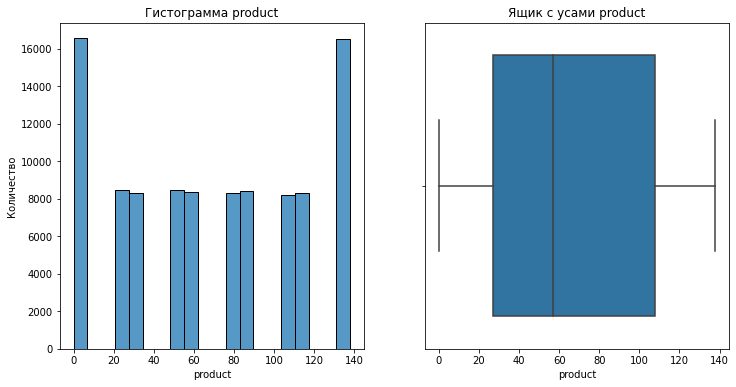

In [14]:
plot_features(data_1)

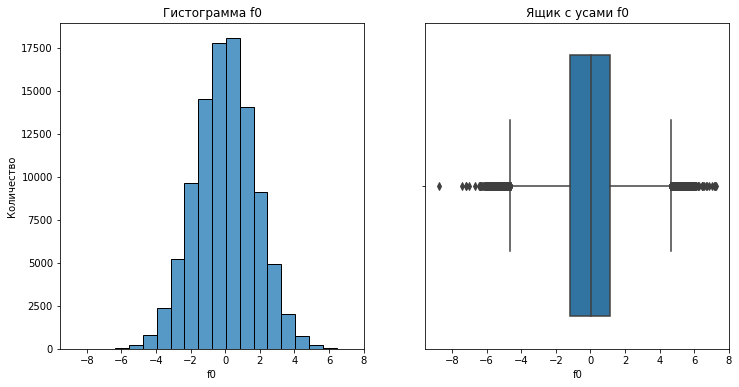

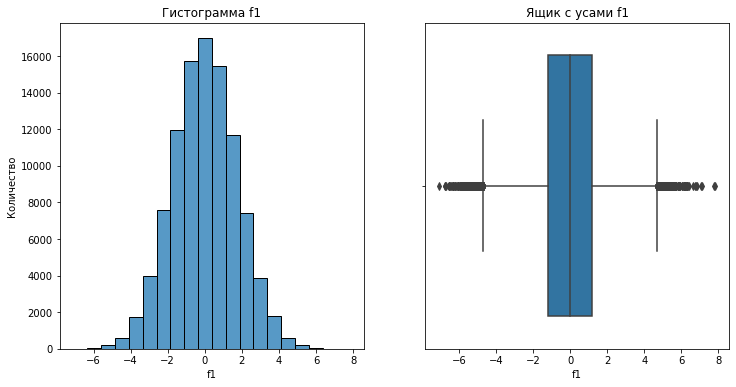

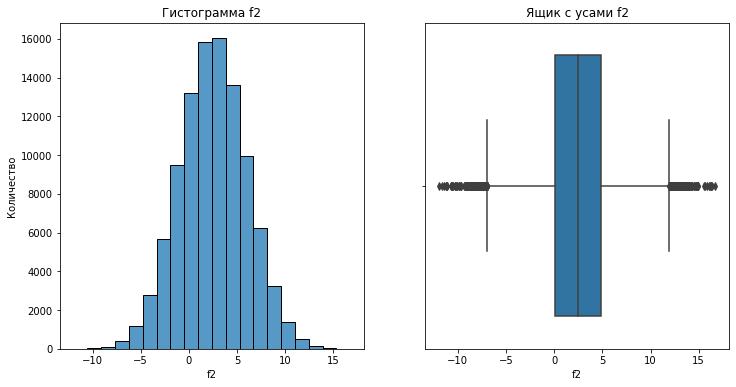

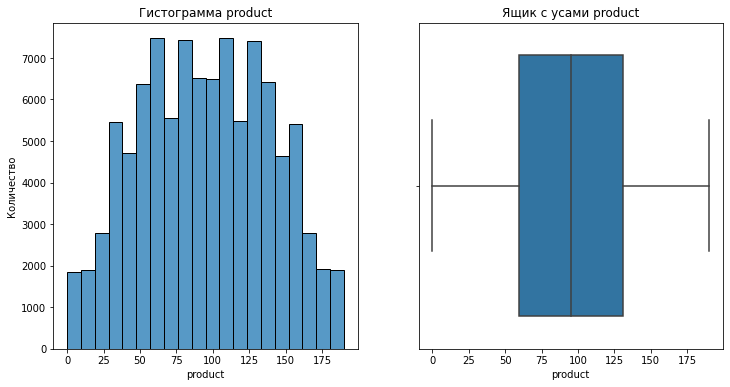

In [15]:
plot_features(data_2)

Посмотрели данные на графиках. Да, выбросы похоже есть, по ящику с усами это видно. Еще, во втором регионе признаки f2 и product  - это не нормальное распределение. Почему нельзя сказать, у нас совсем нет дополнительных данных. Возможно дело в сборе информации по данному показателю, человеческий фактор или оборудование.

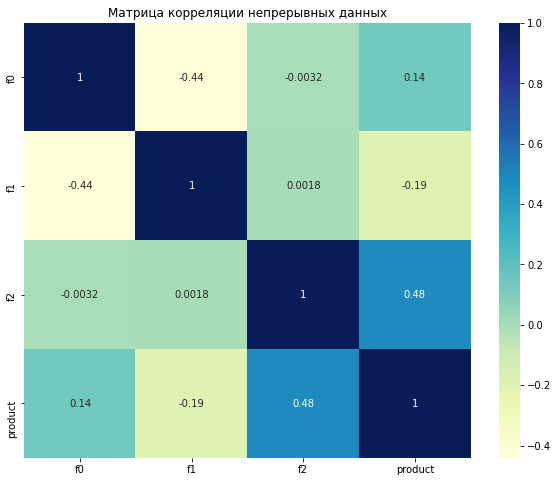

In [16]:
def plot_correlation_matrix(data):
    
    # Создание матрицы корреляции
    correlation_matrix = data.corr()

    # Построение тепловой карты
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
    plt.title('Матрица корреляции непрерывных данных')
    plt.show()
    
plot_correlation_matrix(data_0)

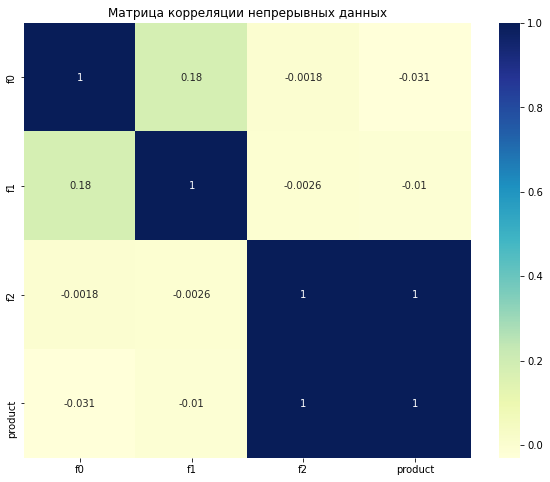

In [17]:
plot_correlation_matrix(data_1)

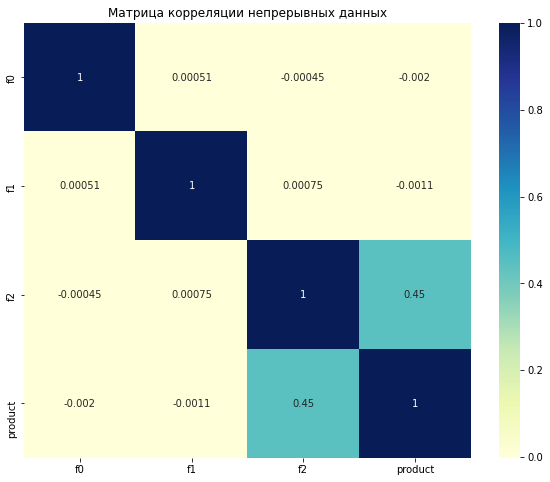

In [18]:
plot_correlation_matrix(data_2)

В целом f2 коррелируюет с целевым признаком.

<div class="alert alert-block alert-info">
<b>Совет:</b> Можно было бы еще выдвинуть предположение, откуда такая высокая корреляция во 2 регионе с целевым признаком могла возникнуть
</div>



<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошо, особенно радует, что изучены корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>




<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и ydata_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: ydata_profiling.ProfileReport(df) 
</div>


## Обучение и проверка модели

In [19]:
X = data_0.drop('product', axis=1)
y = data_0['product']  
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания на валидационной выборке
predictions = model.predict(X_valid)

# Сохранение предсказаний и правильных ответов
results = pd.DataFrame({'Prediction': predictions, 'Actual': y_valid})
results.to_csv('predictions.csv', index=False)

# Вывод среднего запаса предсказанного сырья и RMSE модели
mean_predicted = np.mean(predictions)
rmse = np.sqrt(mean_squared_error(y_valid, predictions))
print("Средний запас предсказанного сырья:", mean_predicted)
print("RMSE модели:", rmse)

Средний запас предсказанного сырья: 92.60984027552014
RMSE модели: 37.68508926201444


In [20]:
def train_and_evaluate_model_for_region(region_data, region_name):
    X = region_data.drop('product', axis=1)
    y = region_data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_valid)
    
    mse = mean_squared_error(y_valid, predictions)
    rmse = np.sqrt(mse)
    
    print(f"Средний запас предсказанного сырья для региона {region_name}:", np.mean(predictions))
    print(f"RMSE модели для региона {region_name}:", rmse)
    
    return model, predictions, y_valid

# Пример использования функции для каждого региона
model_0, predictions_0, y_valid_0 = train_and_evaluate_model_for_region(data_0, "Регион 0")
model_1, predictions_1, y_valid_1 = train_and_evaluate_model_for_region(data_1, "Регион 1")
model_2, predictions_2, y_valid_2 = train_and_evaluate_model_for_region(data_2, "Регион 2")

Средний запас предсказанного сырья для региона Регион 0: 92.60984027552014
RMSE модели для региона Регион 0: 37.68508926201444
Средний запас предсказанного сырья для региона Регион 1: 68.57703454115173
RMSE модели для региона Регион 1: 0.8928265978121422
Средний запас предсказанного сырья для региона Регион 2: 94.93478722287514
RMSE модели для региона Регион 2: 40.080822438088305


Лучшие показатели дает первая модель для первого региона соответственно. Метрика RMSE меньше всего в ней. Со второй моделью  дела совсем плохи, скорее всего дело в странных данных, которые мы уведели а графиках на предыдущем шаге.

## Подготовка к расчёту прибыли

In [21]:
wells = 200                 #200 лучших точек для разработки
budget = 10000000000        #бюджет на разработку скважин в регионе — 10 млрд рублей
revenue = 450000            #тысяча баррелей сырья приносит 450 тыс рублей дохода

In [22]:
break_even_point = budget / revenue / wells 
print('Минимальный объем сырья разработки новой скважины =', round(break_even_point, 3), 'тыс.бар.')

Минимальный объем сырья разработки новой скважины = 111.111 тыс.бар.


In [23]:
print('Средний запас сырья на скважину в первом регионе', data_0['product'].mean())
print('Средний запас сырья на скважину во втором регионе', data_1['product'].mean())
print('Средний запас сырья на скважину в третьем регионе', data_2['product'].mean())

Средний запас сырья на скважину в первом регионе 92.49968421774354
Средний запас сырья на скважину во втором регионе 68.82391591804064
Средний запас сырья на скважину в третьем регионе 94.99834211933378


В итоге, с учетом наших вводных касающихся рентабельност, экономически целесообразно рзрабатывать скважины объем сырья которых выше 111.111 тыс. бар

## Расчёт прибыли и рисков 

In [24]:
def profit_calc(target, probabilities, revenue, count): 
    probs_sorted = probabilities.sort_values(ascending=False) 
    selected = target[probs_sorted.index][:count]             
    return revenue * selected.sum() - budget                 

In [25]:
reg = 1
for dataset in [data_0, data_1, data_2]:
    features = dataset.drop(['product'], axis=1)  
    target = dataset['product']  

    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                                  target,
                                                                                  test_size=0.25,
                                                                                  random_state=12345)

    model = LinearRegression() 
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    
    predictions_valid_ = pd.Series(predictions_valid)                                            
    target_valid_ = pd.Series(target_valid).reset_index(drop=True) 
    state = np.random.RandomState(12345)
    
    values = []
    
    for i in range(1000):
        indices = state.choice(target_valid_.index, size=500, replace=True) 
        target_subsample = target_valid_[indices]
        probs_subsample = predictions_valid_[indices]
        values.append(profit_calc(target_subsample, probs_subsample, revenue, wells))

    values = pd.Series(values)

    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    risk = round(st.percentileofscore(values, 0))
    
    print('Для региона', reg, ':')
    print('Средняя выручка =', round((round(mean, 3))/1000000), 'млн.')
    print('Доверительный интервал: [', round(lower,3), ':', round(upper,3), ']')
    print('Риск -', risk, '%')
    
    reg += 1

Для региона 1 :
Средняя выручка = 409 млн.
Доверительный интервал: [ -131536028.702 : 944395582.755 ]
Риск - 7 %
Для региона 2 :
Средняя выручка = 537 млн.
Доверительный интервал: [ 114527902.902 : 970787910.995 ]
Риск - 1 %
Для региона 3 :
Средняя выручка = 354 млн.
Доверительный интервал: [ -159194031.191 : 875652502.871 ]
Риск - 10 %


Исходя из полученных данных, наиболее подходящим для добычи нефти представляется регион 2. Он показывает самую высокую среднюю выручку в размере 537 млн. и наименьший риск убытков (1%). Доверительный интервал для средней прибыли также демонстрирует наиболее узкий диапазон для региона 2, что свидетельствует о более высокой уверенности в прогнозируемой прибыли.

Поэтому, рекомендуется выбрать регион 2 для разработки скважин из-за более благоприятных перспектив по отношению к риску и потенциальной прибыли.

## Общий вывод

1. На первом шаге мы загрузили и подготовили данные для дальнейшей работы. Бегло просмотрели содержание, проверили данные на стандартные ошибки. Явных дубликатов не нашли. Нам нужно было что-то сделать с айди, потому что по условию задачи, нужно будет обучить три модели линейной регрессии, а судя по характеристике данных id у нас object и судя по содержанию столбцов представляют собой буквы и цифры. И, по идее нужно удалить строки с повторяющимися айдишками, что мы и сделали. Нашли 10 дубликатов, хотя они врядли бы на что-то повлияли.. Но мы сделали все по фэншую. После удалили столбцы с айди.

Далее при помощи функции, пострили графики для всех файлов.  Посмотрели данные на графиках. Да, выбросы похоже есть, по ящику с усами это видно. Еще, во втором регионе признаки f2 и product - это не нормальное распределение. Почему нельзя сказать, у нас совсем нет дополнительных данных. Возможно дело в сборе информации по данному показателю, человеческий фактор или оборудование.

Построили матрицы корреляции, чтобы посмотреть как данные влияют друг на дргуа. У нас только цифры, впереди модель линейной регреессии. Нам отличсно подходит корреляция Пирсона, ведь мы имеем дело с непрерывными данными. Посмотрели, В целом f2 коррелируюет с целевым признаком во всех трех файлах.

2.  Обученили и проверили модель линейной регрессии. 
Лучшие показатели получили у первой модели для первого региона соответственно. Метрика RMSE меньше всего в ней. Со второй моделью дела совсем плохи, скорее всего дело в странных данных, которые мы уведели а графиках на предыдущем шаге.

3. На третьем шаге провели подготовку к расчету прибыли. Внесли все данные нам показатели в константы Пайтон.  
Посчитали минимальный объем сырья разработки новой скважины = 111.111 тыс.бар.  
Средний запас сырья на скважину в первом регионе 92.49968421774354  
Средний запас сырья на скважину во втором регионе 68.82391591804064  
Средний запас сырья на скважину в третьем регионе 94.99834211933378  

Таким образом на третьем шаге доказали, что далеко не все скважины нам подходят.

4. Провели процедуру *Bootstrap*, как и требоавлось. 
Выяснили все необходимы показатели для каждого региона, сделали вывод и выбрали регион номер 2 для дальнейшей разработки.


Для региона 1 :  
Средняя выручка = 409 млн.  
Доверительный интервал: [ -131536028.702 : 944395582.755 ]  
Риск - 7 %  
Для региона 2 :  
Средняя выручка = 537 млн.  
Доверительный интервал: [ 114527902.902 : 970787910.995 ]  
Риск - 1 %  
Для региона 3 :  
Средняя выручка = 354 млн.  
Доверительный интервал: [ -159194031.191 : 875652502.871 ]  
Риск - 10 %  
Исходя из полученных данных, наиболее подходящим для добычи нефти представляется регион 2. Он показывает самую высокую среднюю выручку в размере 537 млн. и наименьший риск убытков (1%). Доверительный интервал для средней прибыли также демонстрирует наиболее узкий диапазон для региона 2, что свидетельствует о более высокой уверенности в прогнозируемой прибыли.

Поэтому, рекомендуется выбрать регион 2 для разработки скважин из-за более благоприятных перспектив по отношению к риску и потенциальной прибыли.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован